In [1]:
#Global definition
sizeOfAutoGeneratedPlainText_min = 5000
sizeofAutoGeneratedPlainText_Max = 15000
sizeofAutoGeneratedKey_min = 5
sizeofAutoGeneratedKey_max = 30
index_of_coincidence_range_low = 0.056
index_of_coincidence_range_high = 0.060
index_of_coincidence_delta = 0.001

#This is the % Alphabet distribution in the english language; 
#Source: https://www3.nd.edu/~busiforc/handouts/cryptography/letterfrequencies.html
freqCnt = [0.084966, 0.020720, 0.045388,  
           0.033844, 0.111607, 0.018121,  
           0.024705, 0.030034, 0.075809,  
           0.001965, 0.011016, 0.054893,  
           0.030129, 0.066544, 0.071635,  
           0.031671, 0.001962, 0.075809,  
           0.057351, 0.069509, 0.036308,  
           0.010074, 0.012899, 0.002902,  
           0.017779, 0.002722
          ]
freqDict = dict()
x_axis_list = list()
y_axis_ave_key_size_list = list()
y_axis_ave_pass_rate_list = list()
y_axis_ave_fail_rate_list = list()

In [2]:
#PlainText copied from NyTimes

#88 Bytes long (approximately)
raw_pt2_251 = """

Saudi Arabia's de facto ruler, Crown Prince Mohammed bin Salman, hit back at Joe Biden after the US President 

"""

raw_pt2_25 = """

Saudi Arabia's de facto ruler, Crown Prince Mohammed bin Salman, hit back at Joe Biden after the US President confronted him about the 2018 murder of Saudi journalist Jamal Khashoggi during a meeting between the two leaders on Friday, according to a source familiar with the matter.

"""


In [3]:
def generateRandomKey(max_key_size):
    import random
    import string
    r1 = random.randint(5,max_key_size)
    letters = string.ascii_uppercase
    res = ''.join(random.choice(letters) for i in range(r1))
    #print(f'keyLength: {r1}')
    return res, r1


def generatePlainText():
    import string
    import random
    global sizeOfAutoGeneratedPlainText_min
    global sizeOfAutoGeneratedPlainText_Max
    tempStr = ''
    size = random.randint(5000, 15000) #Todo:Why the hell can't i use globals here.
    letters = string.ascii_uppercase
    tempStr = ''.join(random.choice(letters) for i in range(size))
    return tempStr

def displayText(s):
    length = len(s)
    numbins = length // 5
    cnt = 0
    for i in s:
        print(i,end='')
        cnt+=1
        if (cnt%5 == 0):
            print('  ',end='')
        if (cnt%75 == 0):
            print()
    

In [4]:
# Question 8:
# Take the three ciphertexts you just generated in Question 4 and
# show your script will decrypt as well
import string
char_set = string.ascii_uppercase

def dec_vigenere(ct, k):
    ct = ct.upper()
    k = k.upper() 
    pt = ""
    key_idx = 0
    
    for char in ct:
        idx = (char_set.find(char) - (char_set.find(k[key_idx]))) % len(char_set)
        
        pt = pt + char_set[idx] 
        key_idx += 1
        
        if (key_idx == len(k)):
            key_idx = 0
            
    return pt

def enc_vigenere(pt, k):
    pt = pt.upper()
    k = k.upper()   
    ct = ""
    key_idx = 0
    
    for char in pt: 
        idx = (char_set.find(char) + (char_set.find(k[key_idx]))) % len(char_set)   
        ct = ct + char_set[idx]
        key_idx += 1      
        if (key_idx == len(k)):
            key_idx = 0 
    return ct

In [5]:
#This will strip out all unwanted charcters from the plaintext
def stripText(s):
    import string
    letters = string.ascii_uppercase
    s = s.upper() #convert everything into uppercase
    tempstr = ''
    for i in s:
        if i in letters:
            tempstr = tempstr+str(i)
    
    return tempstr

In [6]:

def populateFreqDict():
    global freqDict
    #This is a static adding to the dict based on the table given in Lab3-notes
    freqDict['A'] = 0
    freqDict['B'] = 0
    freqDict['C'] = 0
    freqDict['D'] = 0
    freqDict['E'] = 0
    freqDict['F'] = 0
    freqDict['G'] = 0
    freqDict['H'] = 0
    freqDict['I'] = 0
    freqDict['J'] = 0
    freqDict['K'] = 0
    freqDict['L'] = 0
    freqDict['M'] = 0
    freqDict['N'] = 0
    freqDict['O'] = 0
    freqDict['P'] = 0
    freqDict['Q'] = 0
    freqDict['R'] = 0
    freqDict['S'] = 0
    freqDict['T'] = 0
    freqDict['U'] = 0
    freqDict['V'] = 0
    freqDict['W'] = 0
    freqDict['X'] = 0
    freqDict['Y'] = 0
    freqDict['Z'] = 0

def getCipherCharGroups(ct, groupIndex,keyLength):
    lengthOfCipher = len(ct)
    numBins = lengthOfCipher // keyLength
    modVal = lengthOfCipher % keyLength
    if (groupIndex < modVal):
        numBins+=1
    tempStr = ''
    for i in range(numBins):
        tempStr = tempStr + str(ct[groupIndex+i*keyLength])
    return tempStr

def calculate_index_of_coincidence(groupx_ct):
    global freqDict
    populateFreqDict()
    #step-1: count the number of A's, B's, C's, ...
    ct_len = len(groupx_ct)
    for i in range(ct_len):
        freqDict[groupx_ct[i]]+=1
        
    letters = string.ascii_uppercase
    temp_ic = 0.0
    #step-2: Calculate the index of coincidence for the group
    for i in letters:
        temp_ic = temp_ic + (freqDict[i]/ct_len)* ((freqDict[i]-1)/(ct_len-1))
    return temp_ic

In [7]:
def plotGraph(x_list, y_list_ave_pkt_size, y_list_passR,y_list_failR,titleString):
    import matplotlib.pyplot as plt
    import numpy as np
    plt.title(titleString)
    plt.plot(x_list,y_list_ave_pkt_size, color='blue', marker='+', label='Ave-Key-Size')
    plt.plot(x_list,y_list_passR, color='green', marker='*', label='Pass-Rate')
    plt.plot(x_list,y_list_failR, color='red', marker='.', label='Fail-Rate')
    #plt.scatter(x_list,y_list_sage, color='blue',marker='*',label='Sage Factor')
    #plt.plot(x_list,y_axis_list_delta,color='green',marker='.',label='delta(My_func - Sage_Func)')
    plt.xlabel('Packet Size', fontsize=14)
    plt.legend()
    plt.ylabel('Pass/Fail Rate Vs Key-Size', fontsize=14)
    plt.show()
    

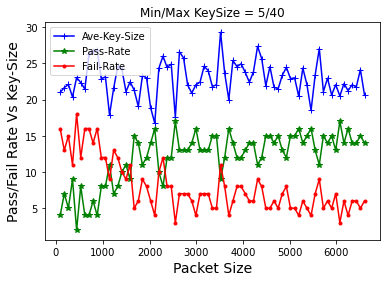

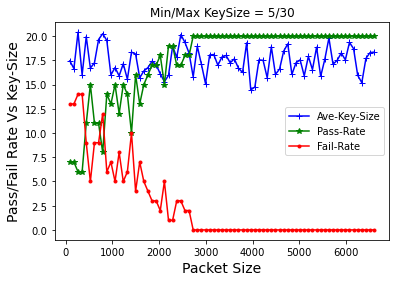

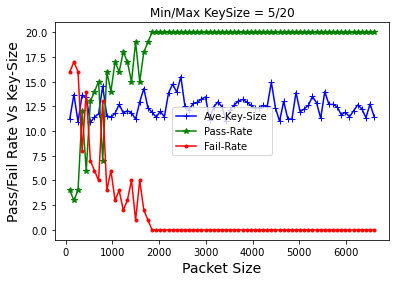

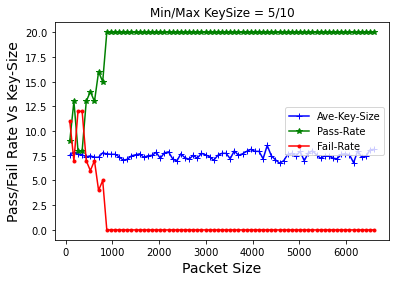

In [8]:
def determineKeyLength(ct_x):
    candidate_keylength = 5
    ic_group_x = 0.0
    ic_list = [0.0]*31
    while (True):
        ic_group_x = 0.0
        for groupIndex in range(candidate_keylength):
            ct_group_x = getCipherCharGroups(ct_x,groupIndex,candidate_keylength)
            #print(ct_x)
            #print(f'****{len(ct_group_x)}')
            #print(ct_group_x)
            if (len(ct_group_x)>1):
                t_val = calculate_index_of_coincidence(ct_group_x)
                ic_group_x += calculate_index_of_coincidence(ct_group_x)
            #print(f'****{len(ct_group_x)} {groupIndex} {ic_group_x} {t_val}')
            #find the average index-of-coincidence
        ic_group_x = ic_group_x/candidate_keylength
        ic_list[candidate_keylength] = ic_group_x
        #if (ic_group_x >= 0.060):
            #Note: This may not be the right key length, but it seems like a match.
        #    break
        candidate_keylength+=1
        if (candidate_keylength > 30):
            break
    #print(ic_list)
    return ic_list


def main_test_max_keySize_30():
    global x_axis_list
    global y_axis_ave_key_size_list
    global y_axis_ave_pass_rate_list
    global y_axis_ave_fail_rate_list
    #Note: We have a plaintext that is 88 bytes long. We will keep
    # multiplying it to increase the size of the cipher-text length 
    # and calculate the various cipher-text length recovery
    pt_x = stripText(raw_pt2_251)
    x_axis_list=list()
    y_axis_ave_key_size_list = list()
    y_axis_ave_pass_rate_list = list()
    y_axis_ave_fail_rate_list = list()
    #One-time-filling-of-x-axis information, packet-size+i*
    for i in range(75):
        x_axis_list.append( 88*(i+1) )
        
    for i in range(75):
        pt_1 = pt_x * (i+1)
        passR = 0
        failR = 0
        ave_key_size = 0
        max_key_size = 30
        for i1 in range(20):
            #try 100 times to determine key-lengths on a cipher-text-length[ct_len]
            key, keylength = generateRandomKey(max_key_size)
            ave_key_size+=keylength
            ct_1 = enc_vigenere(pt_1,key)
            #print(f'{i} {keylength}  ', end='')
            ic_list = determineKeyLength(ct_1)
            #print(ic_list)
            for i2 in range(31):
                if ((ic_list[i2] >= 0.060) and (i2 == keylength)):
                    #print(f'***{i2} {keylength}')
                    passR+=1
                    break
        failR = 20-passR
        #print(f'ct_len: {len(pt_1)} Ave_key_length: {ave_key_size/20} pass: {passR} fail: {failR}')
        y_axis_ave_key_size_list.append(ave_key_size/20)
        y_axis_ave_pass_rate_list.append(passR)
        y_axis_ave_fail_rate_list.append(failR)
        
    plotGraph(x_axis_list,y_axis_ave_key_size_list,y_axis_ave_pass_rate_list,y_axis_ave_fail_rate_list,'Min/Max KeySize = 5/30')

def main_test_max_keySize_20():
    global x_axis_list
    global y_axis_ave_key_size_list
    global y_axis_ave_pass_rate_list
    global y_axis_ave_fail_rate_list
    #Note: We have a plaintext that is 88 bytes long. We will keep
    # multiplying it to increase the size of the cipher-text length 
    # and calculate the various cipher-text length recovery
    pt_x = stripText(raw_pt2_251)
    x_axis_list=list()
    y_axis_ave_key_size_list = list()
    y_axis_ave_pass_rate_list = list()
    y_axis_ave_fail_rate_list = list()
    #One-time-filling-of-x-axis information, packet-size+i*
    for i in range(75):
        x_axis_list.append( 88*(i+1) )
        
    for i in range(75):
        pt_1 = pt_x * (i+1)
        passR = 0
        failR = 0
        ave_key_size = 0
        max_key_size = 20
        for i1 in range(20):
            #try 100 times to determine key-lengths on a cipher-text-length[ct_len]
            key, keylength = generateRandomKey(max_key_size)
            ave_key_size+=keylength
            ct_1 = enc_vigenere(pt_1,key)
            #print(f'{i} {keylength}  ', end='')
            ic_list = determineKeyLength(ct_1)
            #print(ic_list)
            for i2 in range(31):
                if ((ic_list[i2] >= 0.060) and (i2 == keylength)):
                    #print(f'***{i2} {keylength}')
                    passR+=1
                    break
        failR = 20-passR
        #print(f'ct_len: {len(pt_1)} Ave_key_length: {ave_key_size/20} pass: {passR} fail: {failR}')
        y_axis_ave_key_size_list.append(ave_key_size/20)
        y_axis_ave_pass_rate_list.append(passR)
        y_axis_ave_fail_rate_list.append(failR)
        
    plotGraph(x_axis_list,y_axis_ave_key_size_list,y_axis_ave_pass_rate_list,y_axis_ave_fail_rate_list,'Min/Max KeySize = 5/20')

def main_test_max_keySize_10():
    global x_axis_list
    global y_axis_ave_key_size_list
    global y_axis_ave_pass_rate_list
    global y_axis_ave_fail_rate_list
    #Note: We have a plaintext that is 88 bytes long. We will keep
    # multiplying it to increase the size of the cipher-text length 
    # and calculate the various cipher-text length recovery
    pt_x = stripText(raw_pt2_251)
    x_axis_list=list()
    y_axis_ave_key_size_list = list()
    y_axis_ave_pass_rate_list = list()
    y_axis_ave_fail_rate_list = list()
    #One-time-filling-of-x-axis information, packet-size+i*
    for i in range(75):
        x_axis_list.append( 88*(i+1) )
        
    for i in range(75):
        pt_1 = pt_x * (i+1)
        passR = 0
        failR = 0
        ave_key_size = 0
        max_key_size = 10
        for i1 in range(20):
            #try 100 times to determine key-lengths on a cipher-text-length[ct_len]
            key, keylength = generateRandomKey(max_key_size)
            ave_key_size+=keylength
            ct_1 = enc_vigenere(pt_1,key)
            #print(f'{i} {keylength}  ', end='')
            ic_list = determineKeyLength(ct_1)
            #print(ic_list)
            for i2 in range(31):
                if ((ic_list[i2] >= 0.060) and (i2 == keylength)):
                    #print(f'***{i2} {keylength}')
                    passR+=1
                    break
        failR = 20-passR
        #print(f'ct_len: {len(pt_1)} Ave_key_length: {ave_key_size/20} pass: {passR} fail: {failR}')
        y_axis_ave_key_size_list.append(ave_key_size/20)
        y_axis_ave_pass_rate_list.append(passR)
        y_axis_ave_fail_rate_list.append(failR)
        
    plotGraph(x_axis_list,y_axis_ave_key_size_list,y_axis_ave_pass_rate_list,y_axis_ave_fail_rate_list,'Min/Max KeySize = 5/10')

def main_test_max_keySize_40():
    global x_axis_list
    global y_axis_ave_key_size_list
    global y_axis_ave_pass_rate_list
    global y_axis_ave_fail_rate_list
    #Note: We have a plaintext that is 88 bytes long. We will keep
    # multiplying it to increase the size of the cipher-text length 
    # and calculate the various cipher-text length recovery
    pt_x = stripText(raw_pt2_251)
    x_axis_list=list()
    y_axis_ave_key_size_list = list()
    y_axis_ave_pass_rate_list = list()
    y_axis_ave_fail_rate_list = list()
    #One-time-filling-of-x-axis information, packet-size+i*
    for i in range(75):
        x_axis_list.append( 88*(i+1) )
        
    for i in range(75):
        pt_1 = pt_x * (i+1)
        passR = 0
        failR = 0
        ave_key_size = 0
        max_key_size = 40
        for i1 in range(20):
            #try 100 times to determine key-lengths on a cipher-text-length[ct_len]
            key, keylength = generateRandomKey(max_key_size)
            ave_key_size+=keylength
            ct_1 = enc_vigenere(pt_1,key)
            #print(f'{i} {keylength}  ', end='')
            ic_list = determineKeyLength(ct_1)
            #print(ic_list)
            for i2 in range(31):
                if ((ic_list[i2] >= 0.060) and (i2 == keylength)):
                    #print(f'***{i2} {keylength}')
                    passR+=1
                    break
        failR = 20-passR
        #print(f'ct_len: {len(pt_1)} Ave_key_length: {ave_key_size/20} pass: {passR} fail: {failR}')
        y_axis_ave_key_size_list.append(ave_key_size/20)
        y_axis_ave_pass_rate_list.append(passR)
        y_axis_ave_fail_rate_list.append(failR)
        
    plotGraph(x_axis_list,y_axis_ave_key_size_list,y_axis_ave_pass_rate_list,y_axis_ave_fail_rate_list,'Min/Max KeySize = 5/40')




        
if __name__ == "__main__":
    main_test_max_keySize_40()
    main_test_max_keySize_30()
    main_test_max_keySize_20()
    main_test_max_keySize_10()